<div style="text-align: center; color: #155724; background-color: #d4edda; padding: 20px; border: 2px solid #c3e6cb; border-radius: 10px; font-family: Arial, sans-serif;">
  <h1>Analyse Prédictive de la Satisfaction Clientèle<br>d'une Compagnie Aérienne</h1>
  <hr style="border: 1px solid #a8d5ba; width: 60%;">
  <h3 style="color: #0c4128;">NOMS DES PARTICIPANTS :</h3>
  <p>
    - KOFFI KOUAME JEAN BAPTISTE<br>
    - KOUASSI KOUADIO PROSPER
  </p>
  <h4> <strong>UFHB - UFR MI </strong></h4>
  <p><strong>Niveau :</strong> MASTER 1</p>
  <p><strong>Spécialité :</strong> Data Science</p>
</div>


<h2 style="text-align: center;">Introduction</h2>

Dans le secteur aérien, la satisfaction des passagers est un enjeu crucial pour fidéliser la clientèle et améliorer la réputation des compagnies. \
Cette étude vise à identifier les facteurs clés influençant la satisfaction des passagers et à développer un modèle prédictif permettant d'anticiper leur niveau de satisfaction.

## *Objectif d'Etude* 
L'objectif principal est de :

* Comprendre les variables les plus corrélées à la satisfaction client.

* Construire un modèle de scoring capable de prédire si un passager sera satisfait ou non.

* Définir un seuil de décision optimal pour le modèle, permettant de maximiser la pertinence des prédictions.

## *information sur les données*

Les données disponibles comprennent des informations sur :

* Les caractéristiques des passagers (sexe, âge, type de client).

* Les détails du voyage (classe, type de voyage, distance).

* Les évaluations de satisfaction sur divers services (Wi-Fi, restauration, confort, etc.).

* Les retards (départ et arrivée).

La variable cible est **Satisfaction**, avec deux modalités : **"Satisfait"** ou **"Insatisfait"** (en supposant que "Neutre" a été regroupé avec l'une des deux catégories pour simplifier l'analyse binaire).






<h1 style="text-align: center;">Développement</h1>

L'approche suivie combine exploration rigoureuse des données et modélisation prédictive selon cette feuille de route

### 1.importation des packages

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


# data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# data visualization
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from IPython.display import display
import os
sns.set()

# filter warnings
import warnings
warnings.filterwarnings('ignore')

## 2.Chargement des données

* importation et modification de notre jeu de donnée de format excel

In [2]:
path="Données Scoring Statisfaction Clientelle - Aviaton.xlsx"
data = pd.read_excel(path,header=2,index_col="Numero").dropna(how='all')
data.index = data.index.astype(int)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Numero,,,,,,,,,,,,,,,,,,,,,,,,
0,70172.0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047.0,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028.0,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026.0,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299.0,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


* la dimention de notre jeu de donnée

In [4]:
print("Nombre de ligne de la base : ", data.shape[0])
print("Nombre de colonne de la base : " ,data.shape[1])

Nombre de ligne de la base :  103904
Nombre de colonne de la base :  24


* types des variables

In [5]:
# Détection des colonnes numériques
columns_Num = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Détection des colonnes catégorielles (object ou catégorie)
columns_Cat = data.select_dtypes(include=["object", "category"]).columns.tolist()
# Affichage
print(len(columns_Num),"Colonnes numériques :",columns_Num)
print(len(columns_Cat),"Colonnes catégorielles :", columns_Cat) 

19 Colonnes numériques : ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
5 Colonnes catégorielles : ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


* nombre de valeurs non nulles pour chaque colonne

In [7]:
data.count()

id                                   103904
Gender                               103904
Customer Type                        103903
Age                                  103903
Type of Travel                       103900
Class                                103901
Flight Distance                      103901
Inflight wifi service                103902
Departure/Arrival time convenient    103901
Ease of Online booking               103901
Gate location                        103901
Food and drink                       103901
Online boarding                      103902
Seat comfort                         103901
Inflight entertainment               103901
On-board service                     103901
Leg room service                     103901
Baggage handling                     103901
Checkin service                      103901
Inflight service                     103902
Cleanliness                          103902
Departure Delay in Minutes           103902
Arrival Delay in Minutes        

* nombre de valeurs manquantes pour chaque colonne

In [8]:

data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          1
Age                                    1
Type of Travel                         4
Class                                  3
Flight Distance                        3
Inflight wifi service                  2
Departure/Arrival time convenient      3
Ease of Online booking                 3
Gate location                          3
Food and drink                         3
Online boarding                        2
Seat comfort                           3
Inflight entertainment                 3
On-board service                       3
Leg room service                       3
Baggage handling                       3
Checkin service                        3
Inflight service                       2
Cleanliness                            2
Departure Delay in Minutes             2
Arrival Delay in Minutes             310
satisfaction                           3
dtype: int64

la variable **Retard à l'arrivée (minutes)** contient 310 *valeurs manquantes* sur *103904 Observations*.\
Nous en tiendrons compte

* les proportions des satisfaits et insatisfaits

In [9]:
value_counts = data["satisfaction"].value_counts(normalize=True).mul(100).round(2)
print(value_counts.astype(str) + " %")

satisfaction
neutral or dissatisfied    56.67 %
satisfied                  43.33 %
Name: proportion, dtype: object


Le pourcentage des personnes **insatisfaites** est **légèrement plus grand** que celui des **satisfaites**

## 3.Choix de Variables et Data Processing 

* Imputation des valeurs manquantes

In [10]:
from jb_et_ses_fonctions import Imput_Valeur_Manquate as ip
data_sans_na = ip(data, columns_Num, columns_Cat )
assert list(data_sans_na.isnull().sum() ) == [0]*data_sans_na .shape[1]


* description de nos variables numeriques

In [11]:
data_sans_na.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,64924.210502,39.379803,9.636163e+05,9.651565e+02,9.654871e+02,9.651837e+02,9.654037e+02,9.656289e+02,9.656772e+02,9.658662e+02,9.657850e+02,9.658092e+02,9.657778e+02,9.660586e+02,9.657311e+02,9.660672e+02,9.657132e+02,9.772417e+02,9.775597e+02
std,37463.812252,15.114936,3.102300e+08,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05,3.102300e+05
min,1.000000,7.000000,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32533.750000,27.000000,4.140000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,64856.500000,40.000000,8.430000e+02,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
75%,97368.250000,51.000000,1.743000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,1.200000e+01,1.300000e+01
max,129880.000000,85.000000,1.000000e+11,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08


Partant de la description des données, nous remarquons plusieurs valeurs extrêmes non physiques :

* Dans "Flight Distance", certaines observations dépassent 100 000 km, ce qui est irréaliste (🚫 cela représente plus de deux fois le tour de la Terre, dont la circonférence est d’environ 40 000 km).

* Dans "Departure Delay in Minutes" et "Arrival Delay in Minutes", on observe des retards supérieurs à 10 000 minutes, soit environ 7 jours (❌ très probablement des erreurs de saisie).

* Enfin, certains scores de satisfaction sortent de l’échelle attendue entre 0 et 5.

🔍 Par conséquent, je vais d’abord afficher ces valeurs aberrantes pour les quantifier, puis appliquer une fonction de nettoyage afin de supprimer les observations incohérentes et garantir la qualité des données.

In [12]:
from jb_et_ses_fonctions import diagnostic_valeurs_aberrantes
diagnostic_valeurs_aberrantes(data_sans_na)


🔍 Valeurs hors échelle [0-5] dans les variables de satisfaction :
                                   Valeurs hors [0-5]
Inflight wifi service                               1
Departure/Arrival time convenient                   1
Ease of Online booking                              1
Gate location                                       1
Food and drink                                      1
Online boarding                                     1
Seat comfort                                        1
Inflight entertainment                              1
On-board service                                    1
Leg room service                                    1
Baggage handling                                    1
Checkin service                                     1
Inflight service                                    1
Cleanliness                                         1

✈️ Nombre de vols avec une distance > 20 000 km : 1

⏱️ Nombre de retards au départ > 1 440 minutes : 2
⏱️ Nombre de retar

In [13]:
from jb_et_ses_fonctions import nettoyer_valeurs_aberrantes
data_sans_na = nettoyer_valeurs_aberrantes(data_sans_na)


* binarisation de notre variable cible

In [14]:
data_sans_na['satisfaction'] = data_sans_na['satisfaction'].replace({
        'neutral or dissatisfied': 0,
        'satisfied': 1
    })


<h2 style="text-align: center;">Modélisations</h2>
<h3 style="text-align: center;">Regressions logistics</h3>
 

*Pour construire un modèle de scoring de la satisfaction client, nous avons utilisé une régression logistique. Les variables explicatives sont préparées via une fonction d'encodage des variables catégorielles, et les données sont séparées en jeux d’entraînement et de test. Un seuil de décision optimal est ensuite déterminé à l’aide de la courbe ROC, afin de réduire les faux positifs (prédire « satisfait » à tort). Le modèle est ensuite évalué sur plusieurs métriques (accuracy, AUC), ainsi qu'à travers des visualisations telles que la courbe ROC et la matrice de confusion.*

# **modèle avec toutes les variables numeriques**

In [15]:
from jb_et_ses_fonctions import Data_X_y
X_num_compl,y=Data_X_y(columns_Num,data_sans_na,"satisfaction")
X_num_compl.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Numero,,,,,,,,,,,,,,,,,,,
0,70172.0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,5047.0,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,110028.0,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,24026.0,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,119299.0,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0


In [23]:
from jb_et_ses_fonctions import My_model
model, X_train, X_test, y_train, y_test, y_pred_opt, y_prob, best_thresh = My_model(X_num_compl, y,train_size=0.7, random_state=42)

Score sur l'apprentisage : 68.39%
Score sur le test : 68.29%
Log Loss : 0.5975287239796764


<Figure size 1200x500 with 0 Axes>

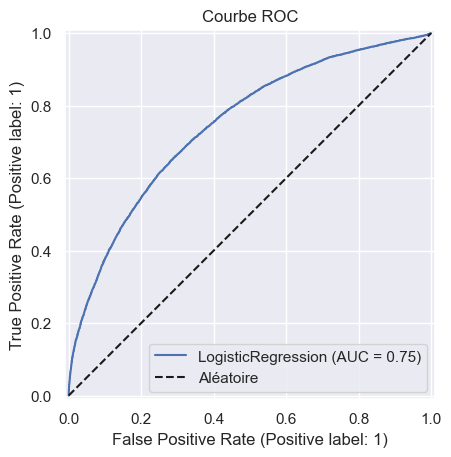

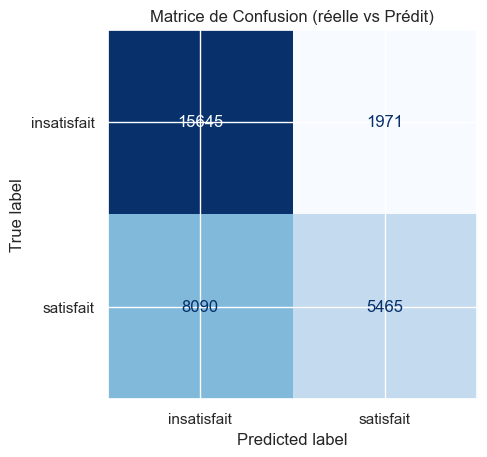


Seuil optimal = 0.6538
proportion de bonnes prédictions(accuracy): 67.72%


In [24]:
from jb_et_ses_fonctions import evaluer_modele
import matplotlib.pyplot as plt

evaluer_modele(model, X_train, y_train, X_test, y_test, y_pred_opt, y_prob, best_thresh)

# **modèle avec toutes les variables de scores de satisfaction**

In [20]:
features = ["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink","Online boarding","Seat comfort",
    "Inflight entertainment","On-board service","Leg room service","Baggage handling","Checkin service","Inflight service","Cleanliness"]
X_num_satis,y=Data_X_y(features,data_sans_na,"satisfaction")
X_num_satis.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Numero,,,,,,,,,,,,,,
0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0
1,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0
2,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0
3,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0
4,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0


Score sur l'apprentisage : 81.65%
Score sur le test : 81.77%
Log Loss : 0.43865680407303603


<Figure size 1200x500 with 0 Axes>

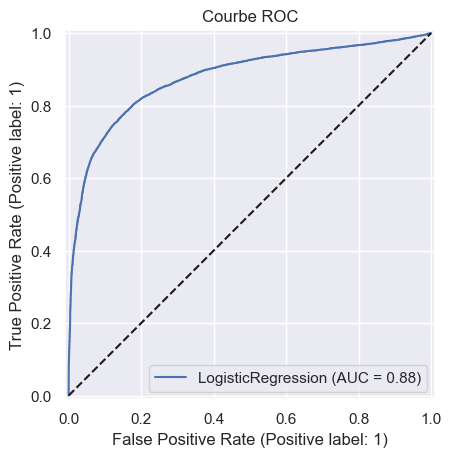

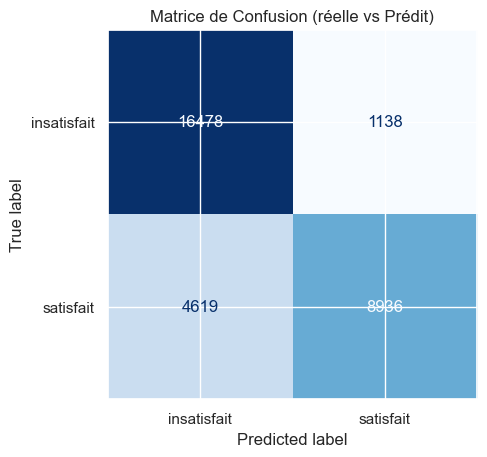


Seuil optimal = 0.6537
proportion de bonnes prédictions(accuracy): 81.53%


In [ ]:
from jb_et_ses_fonctions import My_model
model, X_train, X_test, y_train, y_test, y_pred_opt, y_prob, best_thresh = My_model(X_num_satis, y,train_size=0.7, random_state=42)
from jb_et_ses_fonctions import evaluer_modele
import matplotlib.pyplot as plt

evaluer_modele(model, X_train, y_train, X_test, y_test, y_pred_opt, y_prob, best_thresh)

**remarque**\
Nous remarquons une forte amelioration du score (de 68.29% à 81.77%) . De meme le log_loss sait amelioré egalement.\
voyons d'autre modèles pour voir.

# **modèle avec toutes les variables explicatives**

* encodage des variables catégorielles

In [89]:
from jb_et_ses_fonctions import encoder_colonnes_categorielles
X_encoder=encoder_colonnes_categorielles(data_sans_na, columns_Cat)
X_encoder

✅ Encodage terminé. Dimensions : (103902, 5) → (103902, 10)


,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
Numero,,,,,,,,,,
0,0,0,1,1,0,0,1,0,0,1
1,0,0,1,0,1,1,0,1,0,0
2,1,1,0,1,0,1,0,1,0,0
3,0,1,0,1,0,1,0,1,0,0
4,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,0,1,1,0,0,1,0
103900,1,0,1,1,0,1,0,1,0,0
103901,0,0,1,0,1,1,0,1,0,0


In [48]:
X_num_compl

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Numero,,,,,,,,,,,,,,,,,,,
0,70172.0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,5047.0,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,110028.0,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,24026.0,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,119299.0,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171.0,23.0,192.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0
103900,73097.0,49.0,2347.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
103901,68825.0,30.0,1995.0,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0


In [51]:
df=pd.concat([X_num_compl, X_encoder], axis=1)
df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
Numero,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70172.0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,0,0,1,1,0,0,1,0,0,1
1,5047.0,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,0,0,1,0,1,1,0,1,0,0
2,110028.0,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,1,1,0,1,0,1,0,1,0,0
3,24026.0,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,0,1,0,1,0,1,0,1,0,0
4,119299.0,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171.0,23.0,192.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0,0,1,0,0,1,1,0,0,1,0
103900,73097.0,49.0,2347.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,1,0,1,1,0,1,0,1,0,0
103901,68825.0,30.0,1995.0,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0,0,0,1,0,1,1,0,1,0,0


In [86]:
all_x,y=Data_X_y(df.columns,df,"satisfaction")
all_x=all_x.drop(["satisfaction"],axis=1)
all_x

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
Numero,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70172.0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,0,1,1,0,0,1,0,0,1
1,5047.0,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,0,1,0,1,1,0,1,0,0
2,110028.0,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,1,0,1,0,1,0,1,0,0
3,24026.0,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,1,0,1,0,1,0,1,0,0
4,119299.0,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171.0,23.0,192.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0,1,0,0,1,1,0,0,1,0
103900,73097.0,49.0,2347.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,0,1,1,0,1,0,1,0,0
103901,68825.0,30.0,1995.0,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0,0,1,0,1,1,0,1,0,0


Score sur l'apprentisage : 69.52%
Score sur le test : 69.26%
Log Loss : 0.5797564621874681


<Figure size 1200x500 with 0 Axes>

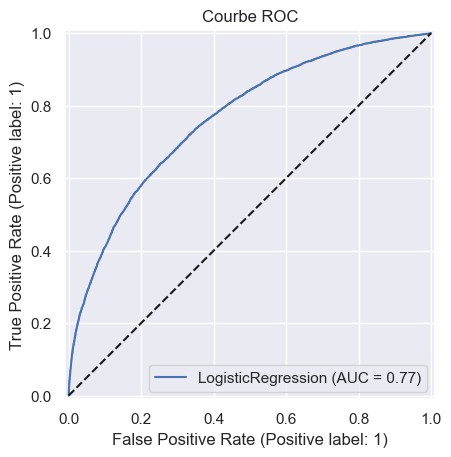

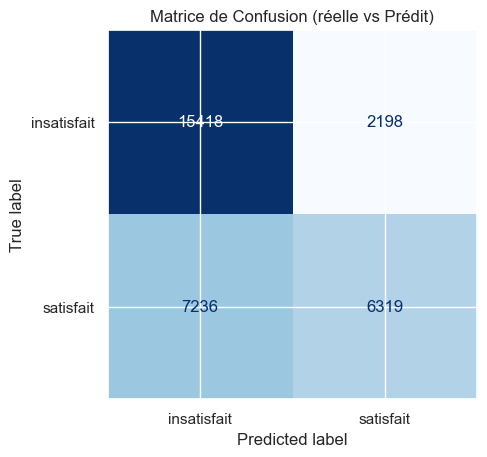


Seuil optimal = 0.6738
proportion de bonnes prédictions(accuracy): 69.73%


In [90]:
from jb_et_ses_fonctions import My_model
model, X_train, X_test, y_train, y_test, y_pred_opt, y_prob, best_thresh = My_model(all_x, y,train_size=0.7, random_state=42)
from jb_et_ses_fonctions import evaluer_modele
import matplotlib.pyplot as plt

evaluer_modele(model, X_train, y_train, X_test, y_test, y_pred_opt, y_prob, best_thresh)

**remarque**

il n'y a pas d'amelioration donc je conserve tjrs mon modèle précedent

# **modèle avec variables categorielles uniquement**

In [91]:
X_encoder=X_encoder.drop(["satisfaction"],axis=1)
X_encoder.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
Numero,,,,,,,,,
0,0,1,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0
2,1,0,1,0,1,0,1,0,0
3,1,0,1,0,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0


In [92]:

x,y=Data_X_y(X_encoder.columns,df,"satisfaction")
x.head()


,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
Numero,,,,,,,,,
0,0,1,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0
2,1,0,1,0,1,0,1,0,0
3,1,0,1,0,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0


Score sur l'apprentisage : 78.15%
Score sur le test : 77.79%
Log Loss : 0.4876822440734076


<Figure size 1200x500 with 0 Axes>

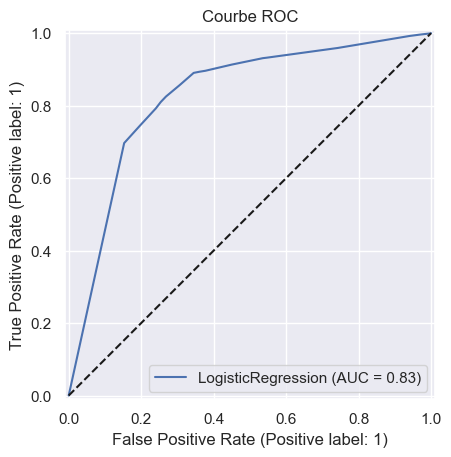

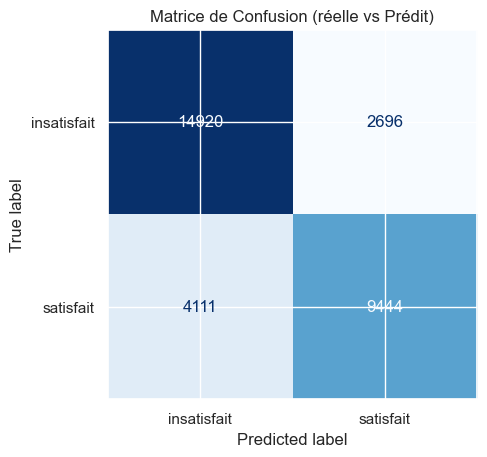


Seuil optimal = 0.7733
proportion de bonnes prédictions(accuracy): 78.16%


In [93]:
from jb_et_ses_fonctions import My_model
model, X_train, X_test, y_train, y_test, y_pred_opt, y_prob, best_thresh = My_model(x, y,train_size=0.7, random_state=42)
from jb_et_ses_fonctions import evaluer_modele
import matplotlib.pyplot as plt

evaluer_modele(model, X_train, y_train, X_test, y_test, y_pred_opt, y_prob, best_thresh)

**remarque**

ce modèle n'est pas mieux que le *modèle avec toutes les variables de scores de satisfaction*

regardons aussi un autre modèle en ajoutant ( Distance de vol,Retard au départ et Retard à l'arrivée) au **modèle avec toutes les variables de scores de satisfaction**

# *modèle avec toutes les variables de scores de satisfaction*+( Distance de vol,Retard au départ et Retard à l'arrivée)

In [78]:
df2=pd.concat([X_num_satis,df[["Flight Distance" ,"Departure Delay in Minutes",	"Arrival Delay in Minutes"]]],axis=1)
df2

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Numero,,,,,,,,,,,,,,,,,
0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,460.0,25.0,18.0
1,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,235.0,1.0,6.0
2,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,1142.0,0.0,0.0
3,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,562.0,11.0,9.0
4,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,214.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,192.0,3.0,0.0
103900,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2347.0,0.0,0.0
103901,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,1995.0,7.0,14.0


Score sur l'apprentisage : 75.21%
Score sur le test : 74.95%
Log Loss : 0.5420405943471933


<Figure size 1200x500 with 0 Axes>

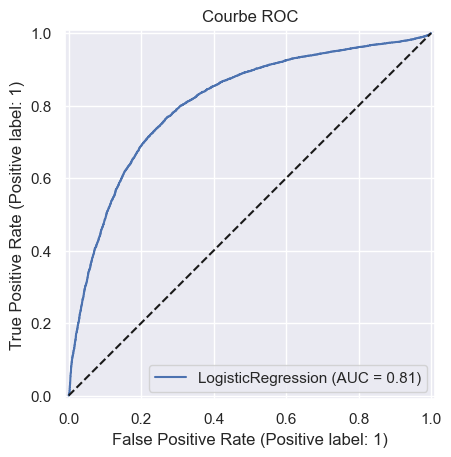

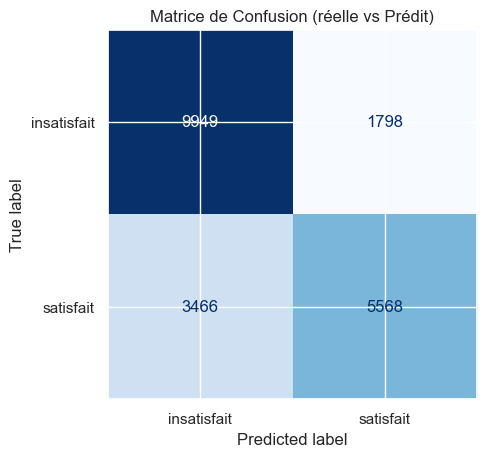


Seuil optimal = 0.5988
proportion de bonnes prédictions(accuracy): 74.67%


In [94]:
from jb_et_ses_fonctions import My_model
model, X_train, X_test, y_train, y_test, y_pred_opt, y_prob, best_thresh = My_model(df2, y,train_size=0.8, random_state=42)
from jb_et_ses_fonctions import evaluer_modele
import matplotlib.pyplot as plt

evaluer_modele(model, X_train, y_train, X_test, y_test, y_pred_opt, y_prob, best_thresh)

**remarque**

ça n'ameliore pas les chose

regardons aussi les random-forest

<h1 style="text-align: center;">Random-forest</h1>

# **Model 1** : Random Forest Standard avec toutes les variables explicatives

* split de ma BD

In [95]:
all_x

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
Numero,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70172.0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,0,1,1,0,0,1,0,0,1
1,5047.0,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,0,1,0,1,1,0,1,0,0
2,110028.0,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,1,0,1,0,1,0,1,0,0
3,24026.0,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,1,0,1,0,1,0,1,0,0
4,119299.0,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171.0,23.0,192.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0,1,0,0,1,1,0,0,1,0
103900,73097.0,49.0,2347.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,0,1,1,0,1,0,1,0,0
103901,68825.0,30.0,1995.0,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0,0,1,0,1,1,0,1,0,0


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(all_x, y, 
                                                    test_size=0.33, random_state=11)

* modèle de random-forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=100, 
                               criterion="entropy", max_depth=20 ) 
                              
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

* evaluation du modèle

In [ ]:
## Get an initial score
score = model.score(X_test, y_test)
# print the model score
print(f"Score sur l'apprentisage : {model.score(X_train, y_train):.2%}")
print(f"Score sur le test : {model.score(X_test, y_test):.2%}")


Score sur l'apprentisage : 99.54%
Score sur le test : 96.35%


Nous remarquons un bon score par rapport au meilleur modèle de la regression logistique(de 81.77% à 96.35%)

In [ ]:
from sklearn import metrics
import numpy as np

# 3. Probabilités prédites
y_prob = model.predict_proba(X_test)[:, 1]

    #4 Calcule de seuil
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
fp_weight = 2.0  # Poids fort sur les FP
fn_weight = 1.0  # Poids standard sur les FN

scores = fp_weight * fpr + fn_weight * (1 - tpr)  # 1 - tpr = taux de FN
ix = np.argmin(scores)  # On cherche à minimiser le score
best_thresh = thresholds[ix]

    # 5. Prédictions avec le seuil optimal
y_pred_opt = (y_prob >= best_thresh).astype(int)

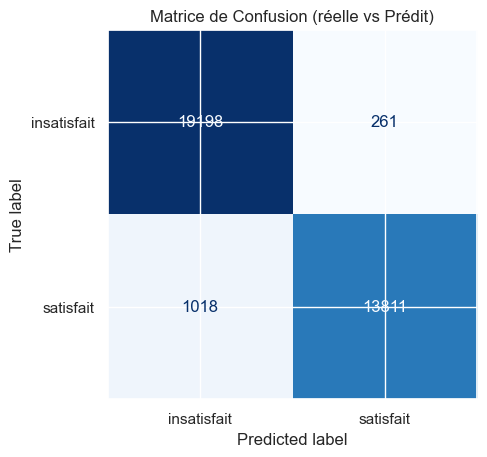


Seuil optimal = 0.5773
proportion de bonnes prédictions(accuracy): 96.27%


In [108]:
# 2. Matrice de confusion VISUELLE
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
        y_test, 
        y_pred_opt,
        display_labels=["insatisfait", "satisfait"],  # Étiquettes personnalisables
        cmap='Blues',
        colorbar=False
    )
plt.title('Matrice de Confusion (réelle vs Prédit)')
plt.show()


metric={'seuil_optimal': best_thresh,
            'accuracy': metrics.accuracy_score(y_test, y_pred_opt)}
   
    
    # Affichage des métriques
print(f"\nSeuil optimal = {metric['seuil_optimal']:.4f}")
print(f"proportion de bonnes prédictions(accuracy): {metric['accuracy']:.2%}")

# **Model 2** : Random Forest Standard avec les variables de scores de satisfaction

In [112]:
X_num_satis

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Numero,,,,,,,,,,,,,,
0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0
1,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0
2,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0
3,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0
4,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0
103900,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
103901,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0


Score sur l'apprentisage : 98.79%
Score sur le test : 94.50%


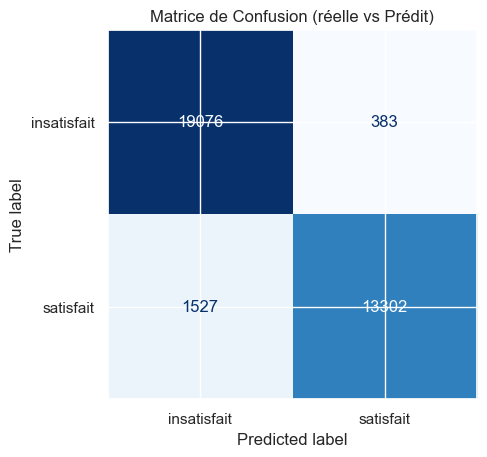


Seuil optimal = 0.5975
proportion de bonnes prédictions(accuracy): 94.43%


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_num_satis, y, 
                                                    test_size=0.33, random_state=11)
#modèle
model = RandomForestClassifier(random_state=42, n_estimators=100, 
                               criterion="entropy", max_depth=20 ) 
                              
model.fit(X_train, y_train)

# print the model score
score = model.score(X_test, y_test)

print(f"Score sur l'apprentisage : {model.score(X_train, y_train):.2%}")
print(f"Score sur le test : {model.score(X_test, y_test):.2%}")

# 3. Probabilités prédites
y_prob = model.predict_proba(X_test)[:, 1]

    #4 Calcule de seuil
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
fp_weight = 2.0  # Poids fort sur les FP
fn_weight = 1.0  # Poids standard sur les FN

scores = fp_weight * fpr + fn_weight * (1 - tpr)  # 1 - tpr = taux de FN
ix = np.argmin(scores)  # On cherche à minimiser le score
best_thresh = thresholds[ix]

    # 5. Prédictions avec le seuil optimal
y_pred_opt = (y_prob >= best_thresh).astype(int)

# 2. Matrice de confusion VISUELLE
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
        y_test, 
        y_pred_opt,
        display_labels=["insatisfait", "satisfait"],  # Étiquettes personnalisables
        cmap='Blues',
        colorbar=False
    )
plt.title('Matrice de Confusion (réelle vs Prédit)')
plt.show()


metric={'seuil_optimal': best_thresh,
            'accuracy': metrics.accuracy_score(y_test, y_pred_opt)}
   
    
    # Affichage des métriques
print(f"\nSeuil optimal = {metric['seuil_optimal']:.4f}")
print(f"proportion de bonnes prédictions(accuracy): {metric['accuracy']:.2%}")

le premier modèle de random-forest est mieux par rapport à celui-ci


<h1 style="text-align: center;">Conclusion</h1>

Cette étude visait à prédire la **satisfaction des passagers aériens** à partir de diverses variables explicatives liées à leur expérience de vol.

Le modèle retenu, **Model 1** : Random Forest Standard avec toutes les variables explicatives, a montré d’excellentes performances :

* Score d'entraînement : 99.54 %

* Score de test : 96.35 %

* Accuracy globale : 96.27 %

* Seuil de décision optimal : 0.5773


L’ajustement du seuil de classification a permis de maximiser la pertinence des prédictions.
La matrice de confusion obtenue montre une capacité du modèle à bien distinguer les passagers satisfaits des insatisfaits, avec un taux d’erreur très faible.

Ce modèle peut être intégré à des systèmes décisionnels pour :

* Anticiper les risques d’insatisfaction

* Orienter les actions de fidélisation

* Améliorer l’expérience client